In [1]:
import pandas as pd
#loading our dataset in a dataframe
data=pd.read_csv('phase1.csv')

#displaying informations about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13599 non-null  int64  
 1   duration                     13599 non-null  int64  
 2   protocol_type                13599 non-null  object 
 3   service                      13599 non-null  object 
 4   flag                         13599 non-null  object 
 5   src_bytes                    13599 non-null  int64  
 6   dst_bytes                    13599 non-null  int64  
 7   land                         13599 non-null  int64  
 8   wrong_fragment               13599 non-null  int64  
 9   urgent                       13599 non-null  int64  
 10  hot                          13599 non-null  int64  
 11  num_failed_logins            13599 non-null  int64  
 12  logged_in                    13599 non-null  int64  
 13  num_compromised 

In [2]:
#searching null values 
data.isnull().sum()

Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [3]:
#searching for duplicated values 
data.duplicated().sum()

0

In [4]:
#we can notice that the column urgent has only 0 as a value by the following function
data.groupby(['urgent']).mean()

Unnamed: 0    duration     src_bytes    dst_bytes      land  \
urgent                                                                  
0       12495.645636  182.747776  11646.661813  4352.227296  0.000074   

        wrong_fragment       hot  num_failed_logins  logged_in  \
urgent                                                           
0             0.001177  0.222149           0.001177   0.701669   

        num_compromised  ...  dst_host_count  dst_host_srv_count  \
urgent                   ...                                       
0              0.404589  ...      149.209795          187.626664   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
urgent                                                   
0                     0.803486                0.041635   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
urgent                                                             
0                          0.121749                     0.025695   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
urgent                                                                         
0                   0.021073                  0.013594              0.046417   

        dst_host_srv_rerror_rate  
urgent                            
0                       0.044595  

[1 rows x 38 columns]

In [5]:
#by using count function we can see that we have 150 anomaly and 13449 normal 
data.groupby(['class']).count()

Unnamed: 0  duration  protocol_type  service   flag  src_bytes  \
class                                                                     
anomaly         150       150            150      150    150        150   
normal        13449     13449          13449    13449  13449      13449   

         dst_bytes   land  wrong_fragment  urgent  ...  dst_host_count  \
class                                              ...                   
anomaly        150    150             150     150  ...             150   
normal       13449  13449           13449   13449  ...           13449   

         dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
class                                                                         
anomaly                 150                     150                     150   
normal                13449                   13449                   13449   

         dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
class                                                               
anomaly                          150                          150   
normal                         13449                        13449   

         dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
class                                                                           
anomaly                   150                       150                   150   
normal                  13449                     13449                 13449   

         dst_host_srv_rerror_rate  
class                              
anomaly                       150  
normal                      13449  

[2 rows x 42 columns]

In [6]:
#we decided to delete urgent column beacause it doesn't have a valuable info 
del data['urgent']

#verifying it was deleted
data.head(1)

Unnamed: 0  duration protocol_type   service flag  src_bytes  dst_bytes  \
0           0         0           tcp  ftp_data   SF        491          0   

   land  wrong_fragment  hot  ...  dst_host_srv_count  dst_host_same_srv_rate  \
0     0               0    0  ...                  25                    0.17   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   

    class  
0  normal  

[1 rows x 42 columns]

In [7]:
#encoding columns that are string type
data=pd.get_dummies(data) 
data

Unnamed: 0  duration  src_bytes  dst_bytes  land  wrong_fragment  hot  \
0               0         0        491          0     0               0    0   
1               1         0        146          0     0               0    0   
2               3         0        232       8153     0               0    0   
3               4         0        199        420     0               0    0   
4              12         0        287       2251     0               0    0   
...           ...       ...        ...        ...   ...             ...  ...   
13594         310         0          0          0     0               0    0   
13595         312         0          0          0     0               0    0   
13596         313         0          0          0     0               0    0   
13597         315         0       1032          0     0               0    0   
13598         316         0          8          0     0               0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_RSTO  \
0                      0          0                0  ...          0   
1                      0          0                0  ...          0   
2                      0          1                0  ...          0   
3                      0          1                0  ...          0   
4                      0          1                0  ...          0   
...                  ...        ...              ...  ...        ...   
13594                  0          0                0  ...          0   
13595                  0          0                0  ...          1   
13596                  0          0                0  ...          0   
13597                  0          0                0  ...          0   
13598                  0          0                0  ...          0   

       flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  \
0              0        0        0        0        0        1        0   
1              0        0        0        0        0        1        0   
2              0        0        0        0        0        1        0   
3              0        0        0        0        0        1        0   
4              0        0        0        0        0        1        0   
...          ...      ...      ...      ...      ...      ...      ...   
13594          0        1        0        0        0        0        0   
13595          0        0        0        0        0        0        0   
13596          0        1        0        0        0        0        0   
13597          0        0        0        0        0        1        0   
13598          0        0        0        0        0        1        0   

       class_anomaly  class_normal  
0                  0             1  
1                  0             1  
2                  0             1  
3                  0             1  
4                  0             1  
...              ...           ...  
13594              1             0  
13595              1             0  
13596              1             0  
13597              1             0  
13598              1             0  

[13599 rows x 104 columns]

In [8]:
#displaying diff basics statistics by using describe() function
data.describe()

Unnamed: 0      duration     src_bytes     dst_bytes          land  \
count  13599.000000  13599.000000  1.359900e+04  1.359900e+04  13599.000000   
mean   12495.645636    182.747776  1.164666e+04  4.352227e+03      0.000074   
std     7333.313621   1371.063164  1.723699e+05  6.941981e+04      0.008575   
min        0.000000      0.000000  0.000000e+00  0.000000e+00      0.000000   
25%     6113.500000      0.000000  1.050000e+02  8.100000e+01      0.000000   
50%    12521.000000      0.000000  2.320000e+02  3.700000e+02      0.000000   
75%    18848.000000      0.000000  3.240000e+02  2.009000e+03      0.000000   
max    25186.000000  36613.000000  7.665876e+06  5.131424e+06      1.000000   

       wrong_fragment           hot  num_failed_logins     logged_in  \
count    13599.000000  13599.000000       13599.000000  13599.000000   
mean         0.001177      0.222149           0.001177      0.701669   
std          0.058150      2.340105           0.043711      0.457542   
min          0.000000      0.000000           0.000000      0.000000   
25%          0.000000      0.000000           0.000000      0.000000   
50%          0.000000      0.000000           0.000000      1.000000   
75%          0.000000      0.000000           0.000000      1.000000   
max          3.000000     77.000000           3.000000      1.000000   

       num_compromised  ...     flag_RSTO     flag_RSTR       flag_S0  \
count     13599.000000  ...  13599.000000  13599.000000  13599.000000   
mean          0.404589  ...      0.003383      0.002574      0.012060   
std          14.172025  ...      0.058064      0.050668      0.109157   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           0.000000  ...      0.000000      0.000000      0.000000   
50%           0.000000  ...      0.000000      0.000000      0.000000   
75%           0.000000  ...      0.000000      0.000000      0.000000   
max         884.000000  ...      1.000000      1.000000      1.000000   

            flag_S1       flag_S2       flag_S3       flag_SF       flag_SH  \
count  13599.000000  13599.000000  13599.000000  13599.000000  13599.000000   
mean       0.006324      0.001250      0.001103      0.933377      0.000147   
std        0.079275      0.035336      0.033195      0.249376      0.012127   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       class_anomaly  class_normal  
count   13599.000000  13599.000000  
mean        0.011030      0.988970  
std         0.104448      0.104448  
min         0.000000      0.000000  
25%         0.000000      1.000000  
50%         0.000000      1.000000  
75%         0.000000      1.000000  
max         1.000000      1.000000  

[8 rows x 104 columns]

In [9]:
#deliting normal column so we can take one colomn as a target 
del data['class_normal']
data


Unnamed: 0  duration  src_bytes  dst_bytes  land  wrong_fragment  hot  \
0               0         0        491          0     0               0    0   
1               1         0        146          0     0               0    0   
2               3         0        232       8153     0               0    0   
3               4         0        199        420     0               0    0   
4              12         0        287       2251     0               0    0   
...           ...       ...        ...        ...   ...             ...  ...   
13594         310         0          0          0     0               0    0   
13595         312         0          0          0     0               0    0   
13596         313         0          0          0     0               0    0   
13597         315         0       1032          0     0               0    0   
13598         316         0          8          0     0               0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0                      0          0                0  ...         0   
1                      0          0                0  ...         0   
2                      0          1                0  ...         0   
3                      0          1                0  ...         0   
4                      0          1                0  ...         0   
...                  ...        ...              ...  ...       ...   
13594                  0          0                0  ...         0   
13595                  0          0                0  ...         0   
13596                  0          0                0  ...         0   
13597                  0          0                0  ...         0   
13598                  0          0                0  ...         0   

       flag_RSTO  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0              0          0        0        0        0        0        1   
1              0          0        0        0        0        0        1   
2              0          0        0        0        0        0        1   
3              0          0        0        0        0        0        1   
4              0          0        0        0        0        0        1   
...          ...        ...      ...      ...      ...      ...      ...   
13594          0          0        1        0        0        0        0   
13595          1          0        0        0        0        0        0   
13596          0          0        1        0        0        0        0   
13597          0          0        0        0        0        0        1   
13598          0          0        0        0        0        0        1   

       flag_SH  class_anomaly  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  
...        ...            ...  
13594        0              1  
13595        0              1  
13596        0              1  
13597        0              1  
13598        0              1  

[13599 rows x 103 columns]

In [10]:
#getting the target and puting it int the Y variable 
#after encoding the data we took 1 as reference to anomaly and 0 to normal
Y = data['class_anomaly']
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
13594    1
13595    1
13596    1
13597    1
13598    1
Name: class_anomaly, Length: 13599, dtype: uint8


In [11]:
#getting all diff features columns into x variable
x=data.iloc[:,:-1]
x

Unnamed: 0  duration  src_bytes  dst_bytes  land  wrong_fragment  hot  \
0               0         0        491          0     0               0    0   
1               1         0        146          0     0               0    0   
2               3         0        232       8153     0               0    0   
3               4         0        199        420     0               0    0   
4              12         0        287       2251     0               0    0   
...           ...       ...        ...        ...   ...             ...  ...   
13594         310         0          0          0     0               0    0   
13595         312         0          0          0     0               0    0   
13596         313         0          0          0     0               0    0   
13597         315         0       1032          0     0               0    0   
13598         316         0          8          0     0               0    0   

       num_failed_logins  logged_in  num_compromised  ...  flag_OTH  flag_REJ  \
0                      0          0                0  ...         0         0   
1                      0          0                0  ...         0         0   
2                      0          1                0  ...         0         0   
3                      0          1                0  ...         0         0   
4                      0          1                0  ...         0         0   
...                  ...        ...              ...  ...       ...       ...   
13594                  0          0                0  ...         0         0   
13595                  0          0                0  ...         0         0   
13596                  0          0                0  ...         0         0   
13597                  0          0                0  ...         0         0   
13598                  0          0                0  ...         0         0   

       flag_RSTO  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0              0          0        0        0        0        0        1   
1              0          0        0        0        0        0        1   
2              0          0        0        0        0        0        1   
3              0          0        0        0        0        0        1   
4              0          0        0        0        0        0        1   
...          ...        ...      ...      ...      ...      ...      ...   
13594          0          0        1        0        0        0        0   
13595          1          0        0        0        0        0        0   
13596          0          0        1        0        0        0        0   
13597          0          0        0        0        0        0        1   
13598          0          0        0        0        0        0        1   

       flag_SH  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
13594        0  
13595        0  
13596        0  
13597        0  
13598        0  

[13599 rows x 102 columns]

In [12]:
#importing scale function from preprocessing module 
from sklearn.preprocessing import scale 
#data transfrmation (standerisation)
SC = scale(x) 
print(SC)

[[-1.70401891 -0.133294   -0.06472168 ... -0.03323011  0.26716647
  -0.01212812]
 [-1.70388254 -0.133294   -0.06672327 ... -0.03323011  0.26716647
  -0.01212812]
 [-1.7036098  -0.133294   -0.06622432 ... -0.03323011  0.26716647
  -0.01212812]
 ...
 [-1.66133541 -0.133294   -0.06757031 ... -0.03323011 -3.74298461
  -0.01212812]
 [-1.66106267 -0.133294   -0.06158297 ... -0.03323011  0.26716647
  -0.01212812]
 [-1.6609263  -0.133294   -0.0675239  ... -0.03323011  0.26716647
  -0.01212812]]


In [13]:
#spliting data into training data and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SC, Y, test_size=0.30)
print (y_train)
print(y_test)

7979     0
3108     0
2972     0
11067    0
3223     0
        ..
8623     0
10287    0
3662     0
5445     0
2490     0
Name: class_anomaly, Length: 9519, dtype: uint8
231      0
12045    0
9064     0
7427     0
4971     0
        ..
10136    0
9780     0
10303    0
8475     0
9124     0
Name: class_anomaly, Length: 4080, dtype: uint8


In [14]:
#loading the grid search which generate the optimal parameters for the model
from sklearn.model_selection import GridSearchCV
#loading KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
g_params={
    'n_neighbors':[3,5,7,9,11],
    'metric':['euclidean','manhattan']
}
#creat a grid object 
gs = GridSearchCV(
     KNeighborsClassifier(),
     g_params,
     cv = 5 #number of folds
)
gs_results=gs.fit(X_train, y_train) #lancer le grid search et la cross validation


In [15]:
gs_results.best_params_ #dispalying best paramètres found

{'metric': 'manhattan', 'n_neighbors': 3}

In [16]:
#applying with K=3
model= KNeighborsClassifier(n_neighbors=3,metric='manhattan')
model.fit(X_train, y_train)
#evaluation of the model
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [17]:
print(y_test)

231      0
12045    0
9064     0
7427     0
4971     0
        ..
10136    0
9780     0
10303    0
8475     0
9124     0
Name: class_anomaly, Length: 4080, dtype: uint8


In [18]:
#calculating erreurs to see the algorithm behaviors
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
print('MAE error :',mean_absolute_error(y_test,y_pred))
print('MSE error : ', mean_squared_error(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
#we can see that our knn algorithm gives a very good result in this case

MAE error : 0.375
MSE error :  0.0014705882352941176
RMSE 0.038348249442368525


In [19]:
#calculating confusion matrix
from sklearn.metrics import confusion_matrix

CM=confusion_matrix(y_test, y_pred)
print('confusion Matrix is; \n',CM)
#drawing confusiong matrix


confusion Matrix is; 
 [[4041    0]
 [   6   33]]


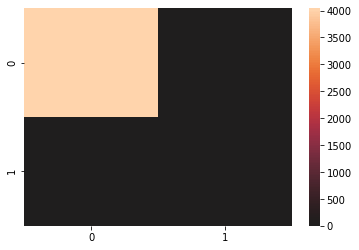

In [22]:
#drawing confusiong matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(CM, center=True)
plt.show()

In [23]:
#calculating the precision and the recall
from sklearn.metrics import precision_score, recall_score

print('precision=',precision_score(y_test,y_pred))
print('recall=',recall_score(y_test,y_pred))


precision= 1.0
recall= 0.8461538461538461


In [24]:
from sklearn.metrics import accuracy_score,classification_report

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4041\n           1       1.00      0.85      0.92        39\n\n    accuracy                           1.00      4080\n   macro avg       1.00      0.92      0.96      4080\nweighted avg       1.00      1.00      1.00      4080\n'

In [25]:
#calculating F score

from sklearn.metrics import f1_score
F=f1_score(y_test, y_pred, average='macro')
 
print(F)


0.9579624134520277


In [ ]:
#95,79% is a very good score but it's not optimal 